$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{October 10, 2025}\\\\\
\text{ Prepared by: Vivek Kumar Agarwal, Ref: Lecture notes Xiang Gao}\\\\
\textbf{Recitation 6: Regression }\\\\
\end{array}
$$



![Causal Inference](../figures/CI_lab6_image1.png)

## Today's Recitation 

- Regression and its relation to Causal Inference
- Descriptive regression versus causal regression
- Lets Code!!

# Let us build some intuition on Regression: The Coffee Shop Mystery 

## The Observation
In cities worldwide, we notice a peculiar pattern:
- **Yoga studio neighborhoods**: Coffee costs $7-8 per latte ☕
- **Auto repair neighborhoods**: Coffee costs $3-4 per latte ☕

**The hasty conclusion:** *"Yoga studios cause expensive coffee!"*

## What is Regression?

**Regression = A sophisticated prediction machine**

It answers: *"Given information X, what's my best guess for Y?"*

### Simple Example:
- **Without regression**: "Average coffee price = $5"
- **With regression**: "You see 3 yoga studios? → Expect $7.50 coffee"

## The Plot Twist

When we look closer, yoga studio neighborhoods also have:
- 📈 Higher incomes
- 🎓 More college graduates  
- 🏢 Higher rents

**Now our regression can include multiple variables:**

Coffee Price = β₀ + β₁(Yoga Studios) + β₂(Income) + β₃(Education) + ε

 #### When we add income, the "yoga effect" nearly disappears!

## Two Different Interpretations - Same Math!

### **Descriptive Regression**
*"I see yoga studios → I predict expensive coffee"*
-  Useful for prediction
-  Don't need to know WHY
-  Just recognizing patterns

###  **Causal Regression**  
*"Opening a yoga studio → causes coffee prices to rise"*
-  Requires strong assumptions
-  Probably wrong here!
-  Need careful research design

## The Real Story

 **Both yoga studios AND expensive coffee are symptoms of wealthy neighborhoods**

They're correlated but neither causes the other 

---

**Key Takeaway:** Same regression, different meanings. 

# A little bit of Math -  Descriptive Regression



### The Model
$$Y = \beta_0 + \beta_1 X + \varepsilon$$

**What this means:** We're describing $Y$ as having two parts:
- **Systematic part**: $\beta_0 + \beta_1 X$ (the pattern we can explain)
- **Random part**: $\varepsilon$ (everything else we can't explain)

### The Optimization Problem
$$\min_{b_0, b_1} E\left[\left(Y - (b_0 + b_1 X)\right)^2\right]$$

**What we're doing:** Finding the best line by minimizing prediction errors
- We're choosing $b_0, b_1$ to make our squared mistakes as small as possible
- This is called **Ordinary Least Squares (OLS)**
- Why squared? It penalizes big mistakes more than small ones

### The Residual
$$\varepsilon \equiv Y - (\beta_0 + \beta_1 X)$$

**What this represents:** Everything about $Y$ that $X$ doesn't explain
- In **descriptive regression**: Just prediction error, no deeper meaning needed
- Contains all other factors affecting $Y$

## Key Properties of Descriptive Regression

### 1. Best Linear Predictor (BLP)
The solution gives us:
$$\beta_1 = \frac{Cov(X,Y)}{Var(X)} = \frac{E[(X-E[X])(Y-E[Y])]}{E[(X-E[X])^2]}$$

**Interpretation**: $\beta_1$ captures how $X$ and $Y$ move together

### 2. Orthogonality Condition
By construction: $E[X \cdot \varepsilon] = 0$

**Meaning**: The residuals are uncorrelated with $X$ (we've extracted all linear information)

### 3. No Causal Requirements
-  $X$ can be caused by $Y$
-  Both can be caused by something else  
-  The relationship can be purely coincidental
- **We're just finding patterns, not explaining mechanisms**

## Our Coffee Prices Example

$$\text{Coffee Price} = \beta_0 + \beta_1 \cdot \text{(Yoga Studios)} + \varepsilon$$

**Descriptive interpretation of $\beta_1 = 1.2$:**
- "Each additional yoga studio is associated with $1.20 higher coffee prices"
- "If I see one more yoga studio, I predict coffee costs $1.20 more"
- "Yoga studios and coffee prices tend to move together"

**What we're NOT saying:**
-  "Opening a yoga studio raises coffee prices by $1.20"
-  "Yoga studios cause expensive coffee"

## The Prediction Focus

In descriptive regression, we care about:
- **Minimizing prediction error**: $E[(Y - \hat{Y})^2]$
- **Maximizing $R^2$**: How much variance we explain
- **Out-of-sample performance**: How well we predict new data

**We don't care about:**
- Whether $X$ causes $Y$
- What's in the residual $\varepsilon$
- Whether our model represents true mechanisms

---

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, Dropdown
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# ============================================
# SCENARIO 1: Ice Cream Sales vs Temperature
# ============================================

def ice_cream_sales(temperature, noise_level=5):
    """True relationship: Ice cream sales increase with temperature"""
    # Non-linear relationship: sales accelerate as it gets hotter
    true_sales = 20 + 2*temperature + 0.05*temperature**2
    # Add realistic noise
    noise = np.random.normal(0, noise_level, len(temperature))
    return true_sales + noise

def drownings(temperature, noise_level=2):
    """Hidden relationship: Drownings also increase with temperature"""
    # People swim more when it's hot
    true_drownings = 5 + 0.3*temperature + 0.01*temperature**2
    noise = np.random.normal(0, noise_level, len(temperature))
    return np.maximum(0, true_drownings + noise)  # Can't be negative

# Closed-form solution
def fit_regression(x, y):
    """Calculate OLS regression coefficients"""
    n = len(x)
    x_mean, y_mean = x.mean(), y.mean()
    beta_1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
    beta_0 = y_mean - beta_1 * x_mean
    return beta_0, beta_1

def calculate_r_squared(y, y_pred):
    """Calculate R-squared"""
    ss_res = ((y - y_pred)**2).sum()
    ss_tot = ((y - y.mean())**2).sum()
    return 1 - (ss_res / ss_tot)

# ============================================
# INTERACTIVE VISUALIZATION
# ============================================

def regression_story(scenario='Temperature → Ice Cream', 
                    min_temp=10, 
                    max_temp=40, 
                    noise_level=5,
                    show_hidden=False):
    """
    Interactive plot showing different regression scenarios
    """
    
    # Generate temperature data
    temperature = np.linspace(min_temp, max_temp, 50)
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    if scenario == 'Temperature → Ice Cream':
        # Direct relationship
        y = ice_cream_sales(temperature, noise_level)
        beta_0, beta_1 = fit_regression(temperature, y)
        y_pred = beta_0 + beta_1 * temperature
        r2 = calculate_r_squared(y, y_pred)
        
        # Plot 1: The observed relationship
        ax1 = axes[0]
        ax1.scatter(temperature, y, alpha=0.6, s=30, label='Actual Sales', color='orange')
        ax1.plot(temperature, y_pred, 'r-', linewidth=2, 
                label=f'Regression: Sales = {beta_0:.1f} + {beta_1:.2f}×Temp')
        ax1.fill_between(temperature, y_pred - noise_level, y_pred + noise_level, 
                         alpha=0.2, color='red', label='Uncertainty')
        ax1.set_xlabel('Temperature (°C)', fontsize=11)
        ax1.set_ylabel('Ice Cream Sales ($100s)', fontsize=11)
        ax1.set_title(f'✅ Descriptive Regression Works!\nR² = {r2:.3f}', fontsize=12, color='green')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Interpretation
        ax2 = axes[1]
        ax2.text(0.1, 0.8, "📊 DESCRIPTIVE INTERPRETATION:", fontsize=14, fontweight='bold',
                transform=ax2.transAxes)
        ax2.text(0.1, 0.65, f"• Each 1°C increase → ${beta_1:.2f}00 more sales", 
                fontsize=12, transform=ax2.transAxes)
        ax2.text(0.1, 0.5, f"• At 30°C, we predict ${beta_0 + beta_1*30:.0f}00 in sales", 
                fontsize=12, transform=ax2.transAxes)
        ax2.text(0.1, 0.35, "• Great for inventory planning! ✓", 
                fontsize=12, color='green', transform=ax2.transAxes)
        ax2.text(0.1, 0.15, "⚡ CAUSAL INTERPRETATION:", fontsize=14, fontweight='bold',
                transform=ax2.transAxes)
        ax2.text(0.1, 0.0, "• Heating the air causes people to buy ice cream ✓", 
                fontsize=12, color='green', transform=ax2.transAxes)
        ax2.axis('off')
        
    elif scenario == 'Ice Cream → Drownings (Spurious)':
        # Spurious correlation through hidden confounder
        ice_cream = ice_cream_sales(temperature, noise_level)
        drowning = drownings(temperature, noise_level/2)
        
        beta_0, beta_1 = fit_regression(ice_cream, drowning)
        drowning_pred = beta_0 + beta_1 * ice_cream
        r2 = calculate_r_squared(drowning, drowning_pred)
        
        # Plot 1: The spurious relationship
        ax1 = axes[0]
        if show_hidden:
            # Color points by temperature to reveal the confounder
            scatter = ax1.scatter(ice_cream, drowning, c=temperature, cmap='coolwarm', 
                                 s=50, alpha=0.7, label='Actual Data')
            plt.colorbar(scatter, ax=ax1, label='Temperature (°C)')
        else:
            ax1.scatter(ice_cream, drowning, alpha=0.6, s=30, color='darkblue')
        
        ax1.plot(ice_cream, drowning_pred, 'r-', linewidth=2,
                label=f'Regression: Drown = {beta_0:.1f} + {beta_1:.3f}×IceCream')
        ax1.set_xlabel('Ice Cream Sales ($100s)', fontsize=11)
        ax1.set_ylabel('Drowning Incidents', fontsize=11)
        ax1.set_title(f'🤔 A Suspicious Correlation\nR² = {r2:.3f}', fontsize=12, color='orange')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Interpretation warning
        ax2 = axes[1]
        ax2.text(0.1, 0.8, "📊 DESCRIPTIVE INTERPRETATION:", fontsize=14, fontweight='bold',
                transform=ax2.transAxes)
        ax2.text(0.1, 0.65, f"• Each $100 in ice cream → {beta_1:.3f} more drownings", 
                fontsize=12, transform=ax2.transAxes)
        ax2.text(0.1, 0.5, "• Good predictor for emergency planning ✓", 
                fontsize=12, color='green', transform=ax2.transAxes)
        
        ax2.text(0.1, 0.3, "⚠️ CAUSAL INTERPRETATION:", fontsize=14, fontweight='bold',
                transform=ax2.transAxes, color='red')
        ax2.text(0.1, 0.15, "• Ice cream causes drowning? ✗", 
                fontsize=12, color='red', transform=ax2.transAxes)
        ax2.text(0.1, 0.0, "• Ban ice cream to save lives? ✗✗✗", 
                fontsize=12, color='darkred', transform=ax2.transAxes)
        
        if show_hidden:
            ax2.text(0.1, -0.15, "🌡️ Hidden truth: Temperature affects both!", 
                    fontsize=12, color='blue', transform=ax2.transAxes, fontweight='bold')
        ax2.axis('off')
    
    elif scenario == 'Coffee Price Example':
        # Our coffee shop story
        # Income is the hidden variable
        income = np.linspace(min_temp*3, max_temp*3, 50)  # Convert to income scale  # Income in $1000s
        yoga_studios = 0.05 * income + np.random.normal(0, 2, 50)  # Rich areas have yoga
        coffee_price = 2 + 0.04 * income + np.random.normal(0, 0.5, 50)  # Income drives prices
        
        beta_0, beta_1 = fit_regression(yoga_studios, coffee_price)
        coffee_pred = beta_0 + beta_1 * yoga_studios
        r2 = calculate_r_squared(coffee_price, coffee_pred)
        
        # Plot 1
        ax1 = axes[0]
        if show_hidden:
            scatter = ax1.scatter(yoga_studios, coffee_price, c=income, cmap='viridis', 
                                 s=50, alpha=0.7)
            plt.colorbar(scatter, ax=ax1, label='Neighborhood Income ($1000s)')
        else:
            ax1.scatter(yoga_studios, coffee_price, alpha=0.6, s=30, color='brown')
        
        ax1.plot(yoga_studios, coffee_pred, 'r-', linewidth=2,
                label=f'Coffee = ${beta_0:.2f} + ${beta_1:.2f}×YogaStudios')
        ax1.set_xlabel('Yoga Studios per Block', fontsize=11)
        ax1.set_ylabel('Coffee Price ($)', fontsize=11)
        ax1.set_title(f'☕ The Coffee Shop Mystery\nR² = {r2:.3f}', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Interpretation
        ax2 = axes[1]
        ax2.text(0.1, 0.8, "📊 DESCRIPTIVE USE:", fontsize=14, fontweight='bold',
                transform=ax2.transAxes)
        ax2.text(0.1, 0.65, f"• Tourist guide: 'See yoga? Expect ${beta_1:.2f} higher coffee'", 
                fontsize=11, transform=ax2.transAxes)
        ax2.text(0.1, 0.5, "• Useful for predicting prices ✓", 
                fontsize=11, color='green', transform=ax2.transAxes)
        
        ax2.text(0.1, 0.3, "⚡ CAUSAL CLAIM:", fontsize=14, fontweight='bold',
                transform=ax2.transAxes, color='red')
        ax2.text(0.1, 0.15, "• 'Opening yoga studio raises coffee prices'? ✗", 
                fontsize=11, color='red', transform=ax2.transAxes)
        
        if show_hidden:
            ax2.text(0.1, -0.05, "💰 Reality: Wealthy neighborhoods have both!", 
                    fontsize=12, color='purple', transform=ax2.transAxes, fontweight='bold')
        ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
interact(regression_story,
    scenario=Dropdown(
        options=['Temperature → Ice Cream', 
                'Ice Cream → Drownings (Spurious)',
                'Coffee Price Example'],
        value='Temperature → Ice Cream',
        description='Scenario:',
        style={'description_width': 'initial'}
    ),
    min_temp=FloatSlider(min=0, max=30, step=5, value=10, description='Min Temp:'),
    max_temp=FloatSlider(min=20, max=50, step=5, value=40, description='Max Temp:'),
    noise_level=FloatSlider(min=0, max=20, step=1, value=5, description='Noise:'),
    show_hidden=Dropdown(
        options=[('Hide Confounder', False), ('Reveal Confounder!', True)],
        value=False,
        description='Hidden Variable:',
        style={'description_width': 'initial'}
    )
)

interactive(children=(Dropdown(description='Scenario:', options=('Temperature → Ice Cream', 'Ice Cream → Drown…

<function __main__.regression_story(scenario='Temperature → Ice Cream', min_temp=10, max_temp=40, noise_level=5, show_hidden=False)>

# Vectorized Implementation for Linear Regression

## From Scalar to Vector Notation

### The Clever Trick: Absorbing the Intercept

We start with our standard regression equation:
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_d X_d + \varepsilon$$

**The problem:** That $\beta_0$ (intercept) is sitting separately, making our math messier.

**The solution:** Treat the intercept as the coefficient of an "imaginary" variable that always equals 1!

### The Transformation

We create augmented vectors:

$$\boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_d \end{bmatrix} \quad \text{and} \quad \boldsymbol{x}^{\top} = \begin{bmatrix} 1 & x_1 & \ldots & x_d \end{bmatrix}$$

**Key insight:** We prepend a "1" to every observation!
- The "1" is a fictitious feature that's constant for everyone
- Its coefficient $\beta_0$ becomes the intercept

### The Clean Vector Form

Now we can write:
$$Y = \boldsymbol{x}^{\top} \boldsymbol{\beta} + \varepsilon$$

This expands to:
$$Y = [1 \cdot \beta_0] + [x_1 \cdot \beta_1] + ... + [x_d \cdot \beta_d] + \varepsilon$$

Which is exactly our original equation! 

## Why This Matters

 **Computational Efficiency**
```python
# Without vectorization (slow)
y_pred = beta_0
for i in range(d):
    y_pred += beta[i] * x[i]

# With vectorization (fast)
y_pred = np.dot(x, beta)  # One operation!

---

# Kernel Regression: Making Linear Regression Learn Curves

## The Problem: When Lines Aren't Enough

Imagine you're studying **sleep quality vs. coffee consumption**:
- 0-2 cups: Sleep improves (you're more alert during day)
- 2-4 cups: Sleep gets worse (too much caffeine)
- 4+ cups: Sleep terrible (you're wired!)

This is a **curved relationship** - but linear regression only draws straight lines! 

## The Brilliant Trick: Add New Features!

### Step 1: Transform Your Data

Instead of just using $X$ (cups of coffee), create new features:
- $X$ = cups of coffee
- $X^2$ = cups of coffee squared
- Maybe even $X^3$ = cups of coffee cubed

### Step 2: Apply Linear Regression in New Space

Now we do "linear" regression on the expanded features:
$$\text{Sleep} = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \varepsilon$$

**The magic:** This is still LINEAR in the parameters ($\beta$s), but NONLINEAR in the original $X$!

## Common Kernel Transformations

### 1. **Polynomial Kernel**
Transform: $X \rightarrow (X, X^2, X^3, ...)$  
Use when: Relationships have curves, peaks, or valleys

### 2. **Interaction Terms**
Transform: $(X_1, X_2) \rightarrow (X_1, X_2, X_1 \cdot X_2)$  
Use when: Features interact (e.g., exercise + diet together)

## Key Insights

**Kernel regression = Linear regression in disguise!** 

We're not changing the algorithm, just giving it better features to work with.

---

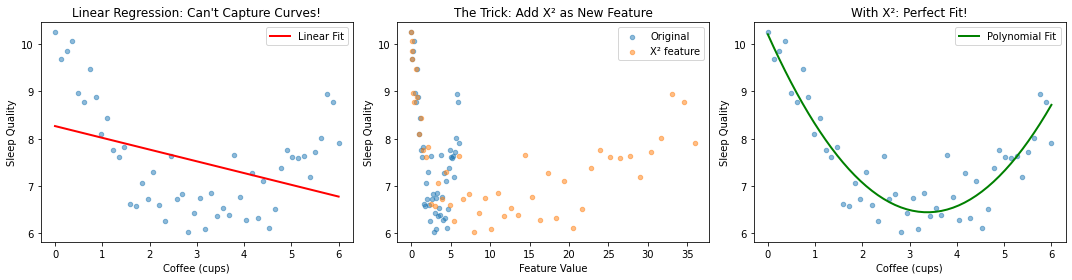

In [2]:


# Generate example data - U-shaped relationship
np.random.seed(42)
X = np.linspace(0, 6, 50)
y_true = 10 - 2*X + 0.3*X**2  # Quadratic relationship
y = y_true + np.random.normal(0, 0.5, 50)  # Add noise

# Fit regular linear regression
beta_1 = np.polyfit(X, y, 1)
y_linear = np.polyval(beta_1, X)

# Fit polynomial (kernel) regression
beta_2 = np.polyfit(X, y, 2)
y_poly = np.polyval(beta_2, X)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Linear fails
axes[0].scatter(X, y, alpha=0.5, s=20)
axes[0].plot(X, y_linear, 'r-', linewidth=2, label='Linear Fit')
axes[0].set_title("Linear Regression: Can't Capture Curves!")
axes[0].set_xlabel('Coffee (cups)')
axes[0].set_ylabel('Sleep Quality')
axes[0].legend()

# Plot 2: Show the transformation
axes[1].scatter(X, y, alpha=0.5, s=20, label='Original')
axes[1].scatter(X**2, y, alpha=0.5, s=20, label='X² feature')
axes[1].set_title("The Trick: Add X² as New Feature")
axes[1].set_xlabel('Feature Value')
axes[1].set_ylabel('Sleep Quality')
axes[1].legend()

# Plot 3: Polynomial works
axes[2].scatter(X, y, alpha=0.5, s=20)
axes[2].plot(X, y_poly, 'g-', linewidth=2, label='Polynomial Fit')
axes[2].set_title("With X²: Perfect Fit!")
axes[2].set_xlabel('Coffee (cups)')
axes[2].set_ylabel('Sleep Quality')
axes[2].legend()

plt.tight_layout()
plt.show()

---

### Something to think!! -- How is Regression related to Neural Networks? 

---

## Let us switch gears to Causal Regression 

---

# From All-Causes Model to Causal Regression: The Complete Flow - Let us underrstand the steps

## Step 1: The True World (All-Causes Model)

### How the world actually works:
$$Y(S, U) = \alpha_0 + \alpha_1 S + U$$

This is the **data-generating process** - how outcomes are actually produced.

**Example**: Coffee prices are determined by:
- $S$ = Yoga studios (what we observe)
- $U$ = Income, rent, demographics (what we don't observe)
- $\alpha_1$ = True causal effect of yoga studios

## Step 2: What We Want (ATE)

### The causal question:
$$\text{ATE} = \mathbb{E}[Y(1) - Y(0)] = \mathbb{E}[Y|S=1] - \mathbb{E}[Y|S=0]$$

**Or in words**: What would happen to coffee prices if we added a yoga studio?

### From the All-Causes Model:
- When $S=1$: $Y(1) = \alpha_0 + \alpha_1 + U$
- When $S=0$: $Y(0) = \alpha_0 + U$  
- Difference: $Y(1) - Y(0) = \alpha_1$

**Therefore: ATE = $\alpha_1$** ✨

## Step 3: The Problem - What We Actually Observe

### We run a regression on observed data:
$$Y = \beta_0 + \beta_1 S + \varepsilon$$

**Critical question: When does $\beta_1 = \alpha_1$?**

### Let's derive what regression actually estimates:

Starting from the true model: $Y = \alpha_0 + \alpha_1 S + U$

The OLS estimate is:
$$\beta_1 = \frac{\text{Cov}(S,Y)}{\text{Var}(S)}$$

Substituting the true model:
$$\beta_1 = \frac{\text{Cov}(S, \alpha_0 + \alpha_1 S + U)}{\text{Var}(S)}$$

$$\beta_1 = \frac{\alpha_1 \cdot \text{Var}(S) + \text{Cov}(S, U)}{\text{Var}(S)}$$

$$\beta_1 = \alpha_1 + \frac{\text{Cov}(S, U)}{\text{Var}(S)}$$

## Step 4: The Key Insight - When Regression is Causal

### Regression gives causal effect when:

$$\beta_1 = \alpha_1 + \underbrace{\frac{\text{Cov}(S, U)}{\text{Var}(S)}}_{\text{Bias term}}$$

**For $\beta_1 = \alpha_1$, we need: $\text{Cov}(S, U) = 0$**

This means: Treatment $S$ is uncorrelated with unobserved factors $U$!



## Step 5: The Complete Flow Diagram

<table style="width:100%; text-align:center; font-family:Arial;">
<tr>
<td style="border:3px solid #333; padding:15px; background-color:#d9d9d9;">
<div style="color:#000000; font-size:16px; font-weight:bold;">TRUE WORLD (All-Causes Model)</div>
<div style="color:#000000; font-size:14px; margin-top:5px;"><b>Y = α₀ + α₁S + U</b></div>
<div style="color:#000000; font-size:14px;"><b>α₁ = True causal effect</b></div>
</td>
</tr>
<tr><td style="font-size:24px; padding:10px;">⬇️</td></tr>
<tr>
<td style="border:3px solid #333; padding:15px; background-color:#cce5ff;">
<div style="color:#000000; font-size:16px; font-weight:bold;">WHAT WE WANT</div>
<div style="color:#000000; font-size:14px; margin-top:5px;"><b>ATE = E[Y(1) - Y(0)] = α₁</b></div>
</td>
</tr>
<tr><td style="font-size:24px; padding:10px;">⬇️</td></tr>
<tr>
<td style="border:3px solid #333; padding:15px; background-color:#ffcccc;">
<div style="color:#000000; font-size:16px; font-weight:bold;">WHAT WE DO (Regression)</div>
<div style="color:#000000; font-size:14px; margin-top:5px;"><b>Y = β₀ + β₁S + ε</b></div>
<div style="color:#000000; font-size:14px;"><b>β₁ = our estimate</b></div>
</td>
</tr>
<tr><td style="font-size:24px; padding:10px;">⬇️</td></tr>
<tr>
<td style="border:3px solid #333; padding:15px; background-color:#ffff99;">
<div style="color:#000000; font-size:16px; font-weight:bold;">THE CRUCIAL QUESTION</div>
<div style="color:#000000; font-size:14px; margin-top:5px;"><b>When does β₁ = α₁?</b></div>
<div style="color:#000000; font-size:14px;"><b>Answer: When Cov(S,U) = 0 ✓</b></div>
</td>
</tr>
</table>

## Step 6: Intuitive Examples

### Scenario A: Randomized Experiment 
**Setup**: Randomly assign yoga studios to neighborhoods

- $S$ is random → $\text{Cov}(S, U) = 0$
- Regression estimate: $\beta_1 = \alpha_1$ ✓
- **Causal interpretation valid!**

### Scenario B: Observational Data (Confounded) 
**Setup**: Yoga studios open in rich neighborhoods

- Rich areas have higher $U$ (other factors increasing price)
- Rich areas have more $S$ (yoga studios)
- Therefore: $\text{Cov}(S, U) > 0$
- Regression estimate: $\beta_1 = \alpha_1 + \text{bias}$
- **Causal interpretation invalid!**

### Scenario C: Controlling for Confounders 
**Setup**: Include income in regression

$$Y = \beta_0 + \beta_1 S + \beta_2 \text{Income} + \varepsilon$$

Now $U$ represents factors OTHER than income:
- If income was the only confounder: $\text{Cov}(S, U|Income) = 0$
- Regression estimate: $\beta_1 = \alpha_1$ ✓
- **Causal interpretation valid (conditional on income)!**

## The Key Takeaway: Causal Regression Requirements

**Descriptive Regression** (Always works):
- Finds patterns: $\beta_1$ = association between $S$ and $Y$
- No assumptions needed about $U$
- Good for prediction

**Causal Regression** (Needs assumptions):
- Estimates causal effect: $\beta_1 = \alpha_1$
- REQUIRES: $\text{Cov}(S, U) = 0$
- Good for understanding mechanisms

**Summary**

1. **The world has a true causal structure** (All-Causes Model)
2. **We want to know the causal effect** (ATE = $\alpha_1$)
3. **We use regression to estimate it** (gives us $\beta_1$)
4. **Regression is only causal if** $S \perp U$ (no confounding)
5. **Otherwise**, $\beta_1 = \alpha_1 + \text{bias}$



---

## What is happening under the hood!!

If we assume the linear all-cause model,
\begin{align}
    Y (S, U) = \alpha_0 + \alpha_1 S +U
\end{align}

The causal residual is U. For causal interpretation, $\mathbb{E}[U] = 0$.

If,

\begin{align}
    E (U) \neq 0
\end{align}


we redefine the

\begin{align}
    & Y (S, U) \\
    &= \alpha_0 + \alpha_1 S +U \\
    &= (\tilde{\alpha}_0 - \mathbb{E}[U]) + \alpha_1 S + \tilde{U} + \mathbb{E}[U] \\
    &= \tilde{\alpha}_0 + \alpha_1 S + \tilde{U}
\end{align}

Then we have the $\mathbb{E}[\tilde{U}] = 0$.


Note:

If we assume
\begin{align}
S \perp U
\end{align}

we can say $\mathbb{E}[SU] = 0$.

### Identification

For descriptive regression, we can always identify.

For causal regression, we need to make assumptions ($S \perp U$).



By transformation, we can have

\begin{align}
    \mathbb{E}[U] = 0 \\
    \implies \mathbb{E}[Y - \beta_0 - \beta_1 X] = 0 \\
    \implies \mathbb{E}[Y] = \beta_0 + \beta_1 \mathbb{E}[X] \\
    \implies \beta_0 = \mathbb{E}[Y] - \beta_1 \mathbb{E}[X]
\end{align}

\begin{align}
E[X U] &=0 \\
\Rightarrow E\left[X\left(Y-\beta_0-\beta_1 X\right)\right] &=0 \\
E\left[X\left(Y-\left(E[Y]-\beta_1 E[X]\right)-\beta_1 X\right)\right] &=0 & (\beta_0 = E[Y] - \beta_1 E[X]) \\
E\left[X\left(Y-E[Y]-\beta_1(X-E[X])\right)\right] & =0 \\
E\left[X(Y-E[Y])-\beta_1 X(X-E[X])\right] & =0 \\
E[X(Y-E[Y])]-\beta_1 E[X(X-E[X])] & =0
\end{align}

\begin{align}
\operatorname{Cov}(X, Y)-\beta_1 \operatorname{Var}(X)=0
\end{align}

\begin{align}
\beta_1 = \frac{\operatorname{Cov}(X, Y)}{\operatorname{Var}(X)}
\end{align}

S: the state.

\begin{align}
Y(S, U)=\beta_0+\beta_1 S+U
\end{align}

Causal Interpretation, If $S \perp U$, then

\begin{align}
\beta_1=\frac{\operatorname{Cov}(S, Y)}{\operatorname{Var}(S)}
\end{align}

Mapping those things to the experiments context, we have

\begin{align}
\operatorname{Cov}(S, Y)
&=E[S Y]-E[S] E[Y]
\end{align}

\begin{align}
E[S Y] & =E[E[S Y \mid S]] \\
& =E[S Y \mid S=1] P(S=1)+E[S Y \mid S=0] P(S=0) \\
& =E[Y \mid S=1] P(S=1) \\
& =E[Y \mid S=1] p
\end{align}


\begin{align}
\begin{aligned}
E[S] E[Y] & =P(S=1)(E[E[Y \mid S]]) \\
& =p([E[Y \mid S=1] p+E[Y \mid S=0](1-p)) \\
& =E[Y \mid S=1] p^2+E[Y \mid S=0] p(1-p)
\end{aligned}
\end{align}

\begin{align}
\begin{aligned}
\operatorname{Var}(S) & =E\left[S^2\right]-E[S]^2 \\
E\left[S^2\right] & =E\left[S^2 \mid S=1\right] p+E\left[S^2 \mid S=1\right](1-p) \\
& =p \\
E[S]^2 & =p^2 \\
\operatorname{Var}(S) & =p-p^2 \\
& =p(1-p)
\end{aligned}
\end{align}


\begin{align}
\begin{aligned}
\beta_1 & =\frac{\operatorname{Cov}(S, Y)}{\operatorname{Var}(S)} \\
& =\frac{p(1-p)(E[Y \mid S=1]-E[Y \mid S=0])}{p(1-p)} \\
& =E[Y \mid S=1]-E[Y \mid S=0]
\end{aligned}
\end{align}

---

# Regression Standard Errors: From Basic to Clustered

## Part 1: Why Do We Need Standard Errors?

Regression gives us an estimate $\hat{\beta}$ - but that's just ONE estimate from ONE sample!

**Key question**: How uncertain is this estimate? If we collected data again, how different might $\hat{\beta}$ be?

**Standard errors tell us**: The typical "wobble" in our estimates across different samples.

## Part 2: The Basic Setup

### Our Estimator
$$\hat{\beta} = \frac{\text{Cov}(S, Y)}{\text{Var}(S)}$$

In matrix form:
$$\hat{\boldsymbol{\beta}}_{\text{OLS}} = (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{y}$$

### The Variance Formula (General Case)

The variance of our estimator is:
$$\mathbb{V}[\hat{\boldsymbol{\beta}}_{\text{OLS}}] = (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\boldsymbol{\Sigma}\mathbf{X}(\mathbf{X}^{\top}\mathbf{X})^{-1}$$

Where $\boldsymbol{\Sigma} = \mathbb{E}[\mathbf{u}\mathbf{u}^{\top}]$ is the covariance matrix of residuals.

**This looks scary!** But it's saying: "The uncertainty in $\hat{\beta}$ depends on how the errors behave"

## Part 3: The Simple Case (Homoskedasticity)

### The Key Assumption
**Homoskedasticity**: All residuals have the same variance $\sigma^2$ and are uncorrelated.

$$\mathbb{E}[\mathbf{u}\mathbf{u}^{\top}] = \sigma^2\mathbf{I}_n = \begin{bmatrix}
\sigma^2 & 0 & \cdots & 0 \\
0 & \sigma^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma^2
\end{bmatrix}$$

### The Simplified Formula

Under homoskedasticity:
$$\mathbb{V}[\hat{\boldsymbol{\beta}}_{\text{OLS}}] = \sigma^2(\mathbf{X}^{\top}\mathbf{X})^{-1}$$

Much cleaner! Standard errors = $\sqrt{\text{diagonal elements}}$

### Example: Coffee Shop Prices

**Homoskedastic scenario**: 
- Small shops: Prices vary by ±$1
- Large shops: Prices vary by ±$1
- Same variability everywhere ✓

## Part 4: When Things Get Complicated (Clustering)

### The Problem: Correlated Errors Within Groups

**Example**: Studying coffee prices across 50 chains, 10 shops each.

**The issue**: 
- Shops within Starbucks are similar to each other
- Shops within Dunkin are similar to each other
- But Starbucks ≠ Dunkin

**This violates independence!** Observations within clusters are correlated.

### Clustered Standard Errors (Liang-Zeger)

**The solution**: Allow correlation within clusters, independence between clusters.

The covariance matrix becomes **block diagonal**:

$$\boldsymbol{\Sigma} = \begin{bmatrix}
\boldsymbol{\Omega}_{\text{Starbucks}} & \mathbf{0} & \mathbf{0} \\
\mathbf{0} & \boldsymbol{\Omega}_{\text{Dunkin}} & \mathbf{0} \\
\mathbf{0} & \mathbf{0} & \boldsymbol{\Omega}_{\text{Others}}
\end{bmatrix}$$

**The clustered variance formula**:
$$\mathbf{X}^{\top}\boldsymbol{\Sigma}\mathbf{X} = \sum_{c \in \text{Clusters}} \mathbf{X}_c^{\top}\boldsymbol{\Omega}_c\mathbf{X}_c$$

We sum up the contribution from each cluster separately!

## Part 5: Concrete Example with Numbers

### Scenario: Effect of Music on Coffee Sales

**Data**: 20 coffee shops, 10 owned by Chain A, 10 by Chain B

**Treatment**: Playing jazz music (S = 1) vs no music (S = 0)

### Without Clustering (Wrong!)
- Assumes all 20 shops are independent
- Standard error might be: SE = 0.5
- Confidence interval: [1.0, 2.0]

### With Clustering by Chain (Correct!)
- Recognizes shops within chains are similar
- Standard error might be: SE = 1.2 (larger!)
- Confidence interval: [0.3, 2.7] (wider!)

**Why larger?** You really have 2 independent units (chains), not 20!

## Part 6: Intuitive Understanding

### Think of it like polling:

**Bad approach**: Poll 1000 people from the same family
- They're correlated (similar views)
- Effective sample size ≈ 1 family, not 1000 people!

**Good approach**: Poll 1000 random families
- Independent observations
- Effective sample size = 1000

### When to Use Clustered Standard Errors:

✓ Students within schools
✓ Patients within hospitals  
✓ Measurements over time (same person)
✓ Stores within chains
✓ Cities within states

**Rule of thumb**: If outcomes might be correlated within groups, cluster!

## The Takeaway

| Method | When to Use | Standard Errors |
|--------|------------|-----------------|
| **Regular OLS** | Independent observations | Smaller (maybe wrong) |
| **Clustered** | Correlated within groups | Larger (conservative) |

**Remember**: Clustering doesn't change $\hat{\beta}$, only its standard error!

DATA STRUCTURE: Students Nested Within Schools
Number of schools: 20
Students per school: 30
Total observations: 600

True causal effect: 5.0 points per hour studied
School quality variation: SD = 10 points (large!)
Individual variation: SD = 3 points (small)

APPROACH 1: IGNORE CLUSTERING (Incorrect)

Coefficient estimate: 4.880
Standard error: 0.1355
95% CI: [4.614, 5.146]
t-statistic: 36.01

APPROACH 2: CLUSTER BY SCHOOL (Correct)

Coefficient estimate: 4.880
Standard error: 0.1208
95% CI: [4.627, 5.133]
t-statistic: 40.41

KEY INSIGHTS

1. Coefficient is THE SAME: 4.880
   (Clustering doesn't change the point estimate)

2. Standard Error INCREASES by 0.89x with clustering
   Without: 0.1355
   With:    0.1208

3. Effective sample size:
   Naive assumption: n = 600 independent students
   Reality: n ≈ 20 independent schools

WHY THIS HAPPENS

Students in the same school are CORRELATED because:
• They share the same teachers
• They share the same resources
• They share the same schoo

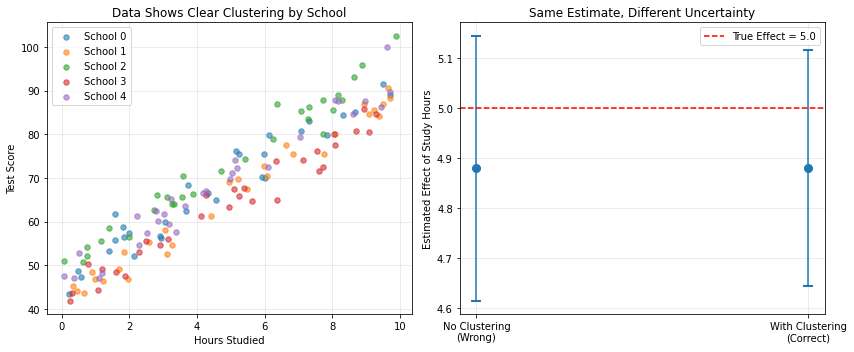


THOUGHT EXPERIMENT: Effect of Number of Clusters

If we had MORE schools (e.g., 100 schools):
• Standard errors would decrease
• More independent units = more information

If we had FEWER schools (e.g., 3 schools):
• Standard errors would increase dramatically
• Only 3 independent units = very little information

Extreme case: 1 school with 600 students
• Can't identify the effect at all!
• No variation between schools = no independent replication


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(42)

# ============================================
# DATA GENERATION WITH CLEAR CLUSTERING
# ============================================

# Setup
n_clusters = 20      # Number of schools
n_per_cluster = 30   # Number of students per school
n_total = n_clusters * n_per_cluster

# Create cluster IDs (which school each student belongs to)
cluster_ids = np.repeat(np.arange(n_clusters), n_per_cluster)

# Generate independent variable (hours studied)
X = np.random.uniform(0, 10, n_total)  

# True causal effect
true_beta = 5.0  # Each hour of study increases score by 5 points

# ============================================
# CREATE CLUSTER-LEVEL CORRELATION
# ============================================

# School-level effects (some schools are just better)
school_quality = np.random.normal(0, 10, n_clusters)  # Big variation between schools!

# Generate test scores with clustering
# Y = Base score + (True effect * Hours) + School effect + Individual noise
y = 50 + true_beta * X + school_quality[cluster_ids] + np.random.normal(0, 3, n_total)

# Put into DataFrame
data = pd.DataFrame({
    'test_score': y,
    'hours_studied': X,
    'school_id': cluster_ids
})

print("=" * 70)
print("DATA STRUCTURE: Students Nested Within Schools")
print("=" * 70)
print(f"Number of schools: {n_clusters}")
print(f"Students per school: {n_per_cluster}")
print(f"Total observations: {n_total}")
print(f"\nTrue causal effect: {true_beta} points per hour studied")
print(f"School quality variation: SD = 10 points (large!)")
print(f"Individual variation: SD = 3 points (small)")

# ============================================
# FIT MODEL WITHOUT CLUSTERING (WRONG!)
# ============================================

print("\n" + "=" * 70)
print("APPROACH 1: IGNORE CLUSTERING (Incorrect)")
print("=" * 70)

# Fit OLS without accounting for clustering
model_no_cluster = smf.ols('test_score ~ hours_studied', data=data).fit()

print(f"\nCoefficient estimate: {model_no_cluster.params[1]:.3f}")  # Use index 1 for hours_studied
print(f"Standard error: {model_no_cluster.bse[1]:.4f}")
conf_int_no_cluster = model_no_cluster.conf_int()
print(f"95% CI: [{conf_int_no_cluster.iloc[1, 0]:.3f}, {conf_int_no_cluster.iloc[1, 1]:.3f}]")
print(f"t-statistic: {model_no_cluster.tvalues[1]:.2f}")

# ============================================
# FIT MODEL WITH CLUSTERING (CORRECT!)
# ============================================

print("\n" + "=" * 70)
print("APPROACH 2: CLUSTER BY SCHOOL (Correct)")
print("=" * 70)

# Fit OLS with clustered standard errors
model_clustered = smf.ols('test_score ~ hours_studied', data=data).fit()
clustered_results = model_clustered.get_robustcov_results(
    cov_type='cluster', 
    groups=data['school_id']
)

print(f"\nCoefficient estimate: {clustered_results.params[1]:.3f}")  # Use index 1
print(f"Standard error: {clustered_results.bse[1]:.4f}")
conf_int_clustered = clustered_results.conf_int()
print(f"95% CI: [{conf_int_clustered[1][0]:.3f}, {conf_int_clustered[1][1]:.3f}]")
print(f"t-statistic: {clustered_results.tvalues[1]:.2f}")

# ============================================
# COMPARISON
# ============================================

print("\n" + "=" * 70)
print("KEY INSIGHTS")
print("=" * 70)

se_ratio = clustered_results.bse[1] / model_no_cluster.bse[1]
print(f"\n1. Coefficient is THE SAME: {model_no_cluster.params[1]:.3f}")
print(f"   (Clustering doesn't change the point estimate)")

print(f"\n2. Standard Error INCREASES by {se_ratio:.2f}x with clustering")
print(f"   Without: {model_no_cluster.bse[1]:.4f}")
print(f"   With:    {clustered_results.bse[1]:.4f}")

print(f"\n3. Effective sample size:")
print(f"   Naive assumption: n = {n_total} independent students")
print(f"   Reality: n ≈ {n_clusters} independent schools")

print("\n" + "=" * 70)
print("WHY THIS HAPPENS")
print("=" * 70)
print("\nStudents in the same school are CORRELATED because:")
print("• They share the same teachers")
print("• They share the same resources")
print("• They share the same school quality")
print("\nIgnoring this correlation makes us overconfident!")

# ============================================
# VISUALIZE THE CLUSTERING
# ============================================

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Show the clustering in the data
ax1 = axes[0]
for school in range(min(5, n_clusters)):  # Show first 5 schools
    school_data = data[data['school_id'] == school]
    ax1.scatter(school_data['hours_studied'], 
               school_data['test_score'], 
               alpha=0.6, s=30, label=f'School {school}')
ax1.set_xlabel('Hours Studied')
ax1.set_ylabel('Test Score')
ax1.set_title('Data Shows Clear Clustering by School')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Compare confidence intervals
ax2 = axes[1]
methods = ['No Clustering\n(Wrong)', 'With Clustering\n(Correct)']
estimates = [model_no_cluster.params[1], clustered_results.params[1]]
errors = [model_no_cluster.bse[1] * 1.96, clustered_results.bse[1] * 1.96]

x_pos = np.arange(len(methods))
ax2.errorbar(x_pos, estimates, yerr=errors, fmt='o', markersize=8, capsize=5, capthick=2)
ax2.axhline(y=true_beta, color='red', linestyle='--', label=f'True Effect = {true_beta}')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(methods)
ax2.set_ylabel('Estimated Effect of Study Hours')
ax2.set_title('Same Estimate, Different Uncertainty')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# BONUS: What if we had more/fewer clusters?
# ============================================

print("\n" + "=" * 70)
print("THOUGHT EXPERIMENT: Effect of Number of Clusters")
print("=" * 70)
print("\nIf we had MORE schools (e.g., 100 schools):")
print("• Standard errors would decrease")
print("• More independent units = more information")
print("\nIf we had FEWER schools (e.g., 3 schools):")
print("• Standard errors would increase dramatically")
print("• Only 3 independent units = very little information")
print("\nExtreme case: 1 school with 600 students")
print("• Can't identify the effect at all!")
print("• No variation between schools = no independent replication")

---

## Next Recitation 

+ Understand more about experiments in real world. 

---